In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


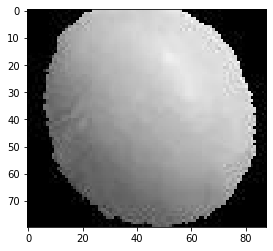

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:/Users/Suporte/Desktop/SementesCnn/"

CATEGORIES = ["Naogerminou", "Germinou"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array,cmap="gray")  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [104]:
print (img_array)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [105]:
print(img_array.shape)


(80, 88)


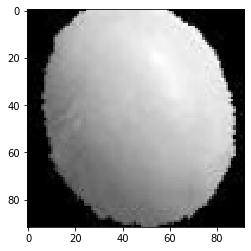

In [106]:
IMG_SIZE = 92

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [107]:
print(new_array.shape)


(92, 92)




# reservar algumas imagens para o teste final

criando manualmente um diretório chamado Testinge, em seguida, criar 2 diretórios dentro dele, um para Doge outro para Cat. A partir daqui, vou apenas mover as 15 primeiras imagens de ambas Doge Catpara as versões de treinamento. Mova-os, não copie. Usaremos isso para nossos testes finais.

In [108]:
training_data  =  [] 

def create_training_data():
    for category in CATEGORIES:  #  cães e gatos 
        # cria caminho para cães e gatos 
        path = os.path.join(DATADIR,category)  
        # obtém a classificação (0 ou 1). 0 = cão 1 = gato 
        class_num = CATEGORIES.index(category)  

         # itere sobre cada imagem por 
        for img in tqdm(os.listdir(path)):  
            try:
                # convertido a matriz 
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
                # redimensione para normalizar o tamanho dos dados 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                 # adicione isso aos nossos dados de treinamento, 
                training_data.append([new_array, class_num]) 
                 # no interesse em manter a saída limpa ... 
            except Exception as e: 
                pass
         

create_training_data()

print(len(training_data))

100%|██████████| 5385/5385 [00:08<00:00, 649.34it/s]


10770


In [111]:
print((training_data[5400][1]))

1


# embaralhar os dados

No momento, nossos dados são apenas todos os cães, depois todos os gatos. Isso geralmente acabará causando problemas também, pois, inicialmente, o classificador aprenderá a prever sempre os cães. Então ele mudará para oh, apenas preveja todos os gatos! Indo e voltando assim também não é bom.

In [115]:
import random

random.shuffle(training_data)

Nossa training_dataé uma lista, o que significa que é mutável, por isso agora está bem embaralhada. Podemos confirmar isso repetindo algumas das amostras iniciais e imprimindo a classe.

In [116]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
0
1
1
1
0
0
1


Ótimo, nós temos as aulas bem misturadas! Hora de fazer o nosso modelo!



In [142]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y=np.array(y)

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]]


In [143]:
print(y.size)

10770


Vamos salvar esses dados, para que não precisemos continuar calculando-os sempre que quisermos brincar com o modelo de rede neural:



In [144]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

Sempre podemos carregá-lo em nosso script atual, ou um totalmente novo, fazendo:



In [146]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)



Agora que obtivemos o conjunto de dados, estamos prontos para cobrir redes neurais convolucionais e implementar uma com nossos dados para classificação.

In [147]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from  tensorflow.keras.callbacks  import  TensorBoard
import time

NAME = "germinou-vs-naogerminou-CNN-64x2-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir="logs\\{}".format(NAME))


gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess=tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


In [148]:
import pickle

pickle_in = open("X.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
b = pickle.load(pickle_in)
y = np.array(b)

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))



model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=1, validation_split=0.3,  callbacks=[ tensorboard])
model.save('64x3-CNN.model')


Train on 7538 samples, validate on 3232 samples


6496/7538 [========================>.....] - ETA: 21:01 - loss: 0.6972 - acc: 0.43 - ETA: 18:54 - loss: 2.9148 - acc: 0.42 - ETA: 17:53 - loss: 2.3554 - acc: 0.47 - ETA: 17:07 - loss: 1.9685 - acc: 0.47 - ETA: 16:38 - loss: 1.8520 - acc: 0.45 - ETA: 16:28 - loss: 1.6965 - acc: 0.47 - ETA: 16:09 - loss: 1.5602 - acc: 0.49 - ETA: 15:56 - loss: 1.4452 - acc: 0.51 - ETA: 15:44 - loss: 1.3614 - acc: 0.51 - ETA: 15:41 - loss: 1.2964 - acc: 0.50 - ETA: 15:31 - loss: 1.2418 - acc: 0.49 - ETA: 15:22 - loss: 1.1960 - acc: 0.49 - ETA: 15:14 - loss: 1.1574 - acc: 0.49 - ETA: 15:11 - loss: 1.1243 - acc: 0.49 - ETA: 15:04 - loss: 1.0954 - acc: 0.49 - ETA: 14:57 - loss: 1.0705 - acc: 0.48 - ETA: 14:50 - loss: 1.0481 - acc: 0.49 - ETA: 14:48 - loss: 1.0283 - acc: 0.50 - ETA: 14:42 - loss: 1.0106 - acc: 0.50 - ETA: 14:36 - loss: 0.9948 - acc: 0.50 - ETA: 14:30 - loss: 0.9802 - acc: 0.51 - ETA: 14:41 - loss: 0.9672 - acc: 0.50 - ETA: 14:37 - loss: 0.9553 - acc: 0.50 - ETA: 14:35 - loss: 0.9444 - acc: 0.

7538/7538 [==============================] - ETA: 3:38 - loss: 0.7230 - acc: 0.490 - ETA: 3:30 - loss: 0.7228 - acc: 0.490 - ETA: 3:23 - loss: 0.7227 - acc: 0.490 - ETA: 3:16 - loss: 0.7226 - acc: 0.490 - ETA: 3:09 - loss: 0.7224 - acc: 0.490 - ETA: 3:01 - loss: 0.7223 - acc: 0.490 - ETA: 2:54 - loss: 0.7221 - acc: 0.490 - ETA: 2:47 - loss: 0.7220 - acc: 0.491 - ETA: 2:40 - loss: 0.7219 - acc: 0.490 - ETA: 2:33 - loss: 0.7217 - acc: 0.490 - ETA: 2:26 - loss: 0.7216 - acc: 0.490 - ETA: 2:19 - loss: 0.7215 - acc: 0.490 - ETA: 2:12 - loss: 0.7213 - acc: 0.489 - ETA: 2:05 - loss: 0.7212 - acc: 0.489 - ETA: 1:58 - loss: 0.7211 - acc: 0.489 - ETA: 1:51 - loss: 0.7210 - acc: 0.489 - ETA: 1:44 - loss: 0.7208 - acc: 0.489 - ETA: 1:37 - loss: 0.7207 - acc: 0.490 - ETA: 1:30 - loss: 0.7206 - acc: 0.491 - ETA: 1:23 - loss: 0.7204 - acc: 0.491 - ETA: 1:17 - loss: 0.7203 - acc: 0.492 - ETA: 1:10 - loss: 0.7202 - acc: 0.492 - ETA: 1:03 - loss: 0.7201 - acc: 0.491 - ETA: 57s - loss: 0.7200 - acc: 0.49

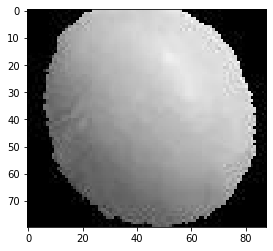

In [71]:


DATADIRNOVA = "C:/Users/Suporte/Desktop/SementesCnn/Testinge"

CATEGORIES = ["Naogerminou"]
path = os.path.join(DATADIR,CATEGORIES[0])  # create path to dogs and cats

for img in os.listdir(path):  # iterate over each image per dogs and cats
    img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
    plt.imshow(img_array,cmap="gray")  # graph it
    plt.show()  # display!
    break
    


(80, 88)


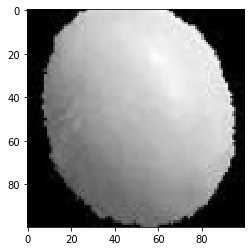

(100, 100)


In [82]:
print(img_array.shape)

IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

print(new_array.shape)

   

In [172]:
CATEGORIES = ["Naogerminou","Germinou"]


def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (92, 92))
    return new_array.reshape(-1, 92, 92, 1)


model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict([prepare('C:/Users/Suporte/Desktop/SementesCnn/Testinge/Germinou/05.jpg')])
print(prediction[0][0])  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])
   

0.6542386
Naogerminou
